#Data Preparation

In [ ]:
 !gdown 1sPVSV_ZZIJL9KdtrbOdBfkAPOCcgVQt1

Downloading...
From: https://drive.google.com/uc?id=1sPVSV_ZZIJL9KdtrbOdBfkAPOCcgVQt1
To: /content/Dataset Gempa Indonesia dan Sekitarnya 01Jan-02Dec 2022.csv
100% 353k/353k [00:00<00:00, 123MB/s]


#Library Preparation

In [ ]:
!pip install geopandas &> /dev/null
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import plotly.express as ex
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px
import missingno as msno
%matplotlib inline

#Load Dataset

In [ ]:
#@title Dataset yang terdownload dalam format CSV dimuat ke variabel ```df```

df = pd.read_csv("/content/Dataset Gempa Indonesia dan Sekitarnya 01Jan-02Dec 2022.csv")

#Cek Ringkasan Dataframe

In [ ]:
#menunjukkan seluruh kolom df
pd.set_option('display.max_columns', None)

In [ ]:
#@title Info dasar.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1900 non-null   object 
 1   latitude         1900 non-null   float64
 2   longitude        1900 non-null   float64
 3   depth            1900 non-null   float64
 4   mag              1900 non-null   float64
 5   magType          1900 non-null   object 
 6   nst              1163 non-null   float64
 7   gap              1900 non-null   int64  
 8   dmin             1900 non-null   float64
 9   rms              1900 non-null   float64
 10  net              1900 non-null   object 
 11  id               1900 non-null   object 
 12  updated          1900 non-null   object 
 13  place            1854 non-null   object 
 14  type             1900 non-null   object 
 15  horizontalError  1900 non-null   float64
 16  depthError       1900 non-null   float64
 17  magError      

In [ ]:
#@title Banyaknya baris dan kolom pada dataframe.
df.shape

(1900, 22)

In [ ]:
#@title Tipe data pada setiap kolom.
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                  int64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst               int64
status              object
locationSource      object
magSource           object
dtype: object

In [ ]:
#@title Cek duplikasi dataframe.
print(f'Jumlah duplikat = {len(df[df.duplicated(keep=False)])}')

Jumlah duplikat = 0


In [ ]:
#@title Cek baris-baris awal dataframe.
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-02T12:49:07.313Z,-8.5913,121.6060,181.933,4.5,mb,24.0,72,0.626,0.66,us,us6000j6aa,2022-12-02T13:07:51.040Z,"28 km NNW of Ende, Indonesia",earthquake,5.36,6.108,0.156,12,reviewed,us,us
1,2022-12-02T08:55:15.079Z,-0.0254,123.2367,155.166,5.0,mb,91.0,44,1.112,0.62,us,us6000j696,2022-12-02T09:11:50.040Z,"65 km SSE of Gorontalo, Indonesia",earthquake,7.87,6.740,0.073,60,reviewed,us,us
2,2022-12-02T02:47:28.607Z,-1.9594,128.4445,39.915,4.5,mb,27.0,100,2.919,0.75,us,us6000j67y,2022-12-02T03:04:03.040Z,"161 km NNW of Amahai, Indonesia",earthquake,8.96,8.222,0.157,15,reviewed,us,us
3,2022-12-01T08:29:42.460Z,-5.0816,100.7432,10.000,5.1,mww,64.0,72,2.319,0.69,us,us6000j5z2,2022-12-01T22:35:14.040Z,"220 km SW of Bengkulu, Indonesia",earthquake,4.84,1.796,0.086,13,reviewed,us,us
4,2022-12-01T06:55:59.115Z,-4.4152,125.7910,409.261,4.2,mb,21.0,62,6.614,0.52,us,us6000j5ya,2022-12-01T07:38:25.040Z,"277 km WSW of Ambon, Indonesia",earthquake,5.55,11.234,0.167,11,reviewed,us,us


In [ ]:
#@title Cek baris-baris akhir dataframe.
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1895,2022-01-02T07:57:04.101Z,-3.0222,130.1375,10.00,4.2,mb,NaN,107,2.111,0.26,us,us7000gbds,2022-03-12T22:19:17.040Z,"139 km ENE of Amahai, Indonesia",earthquake,7.0,1.7,0.167,12,reviewed,us,us
1896,2022-01-01T21:43:14.435Z,3.6089,126.9356,61.38,4.5,mb,NaN,91,2.850,0.52,us,us7000g8de,2022-03-12T22:19:00.040Z,"239 km NNW of Tobelo, Indonesia",earthquake,7.8,7.1,0.071,58,reviewed,us,us
1897,2022-01-01T10:04:40.090Z,3.9011,122.5810,592.07,4.4,mb,NaN,80,3.303,0.76,us,us7000g8az,2022-03-12T22:18:59.040Z,"247 km SSE of Tabiauan, Philippines",earthquake,11.1,1.4,0.072,55,reviewed,us,us
1898,2022-01-01T08:46:29.654Z,2.6360,128.2039,152.56,4.2,mb,NaN,115,2.032,0.42,us,us7000gbcp,2022-03-12T22:19:16.040Z,"102 km NNE of Tobelo, Indonesia",earthquake,10.2,4.2,0.115,21,reviewed,us,us
1899,2022-01-01T00:10:28.735Z,-8.7633,124.3513,104.90,4.1,mb,NaN,68,0.989,0.69,us,us7000g896,2022-03-12T22:18:59.040Z,"48 km N of Pante Makasar, Timor Leste",earthquake,6.7,8.4,0.197,7,reviewed,us,us


In [ ]:
#@title Cek data yang kosong (*null*) dengan angka.
df.isnull().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                737
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place               46
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
dtype: int64

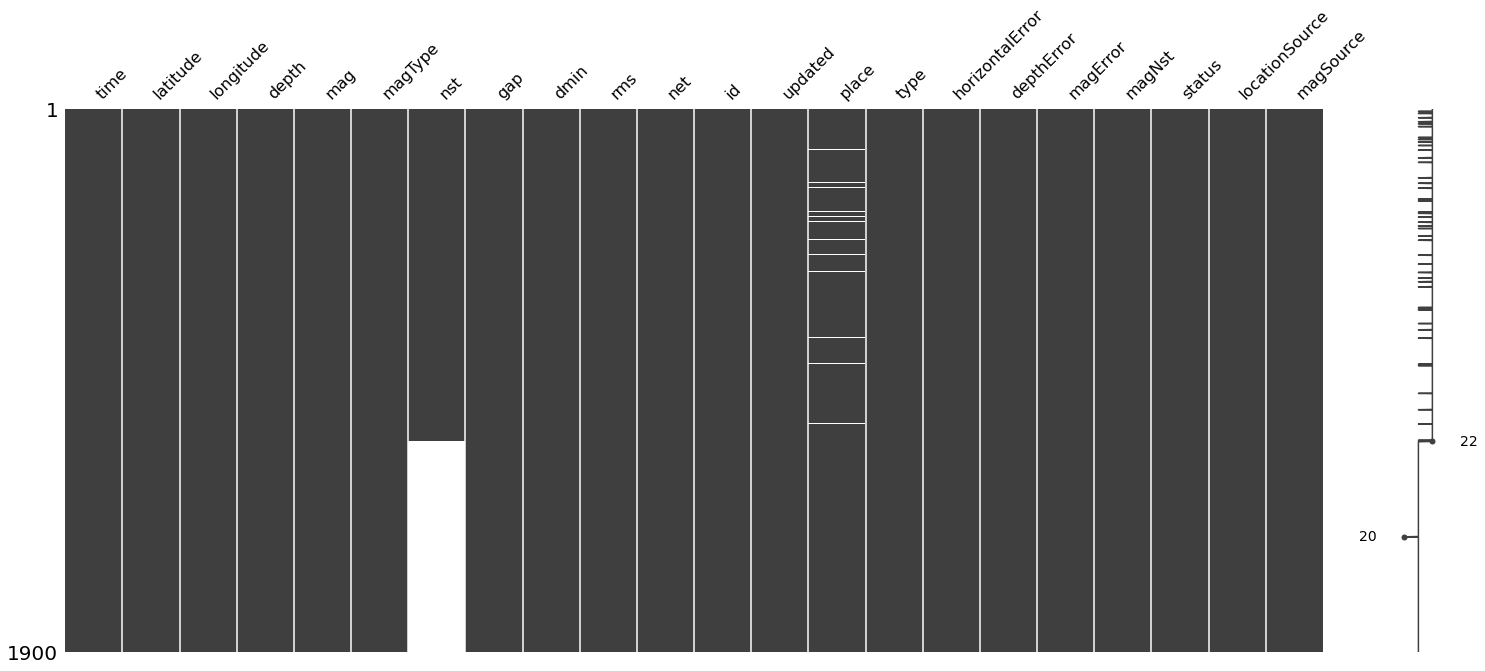

In [ ]:
#@title Cek data yang kosong (*null*) dengan grafik.
msno.matrix(df)

Dari data ini dapat kita lihat bahwasanya banyak data kosong, terutama di kolom bernama ```nst``` yang ternyata setelah dicek memiliki *missing value* sebanyak 737 baris.

#Drop Data yang tidak dibutuhkan.

In [ ]:
#@title Kita hanya butuh data; time, latitude, longitude, depth, mag, dan place.
df_new = df[['time','latitude','longitude','depth','mag','place']]
df_new.head()

,time,latitude,longitude,depth,mag,place
0,2022-12-02T12:49:07.313Z,-8.5913,121.6060,181.933,4.5,"28 km NNW of Ende, Indonesia"
1,2022-12-02T08:55:15.079Z,-0.0254,123.2367,155.166,5.0,"65 km SSE of Gorontalo, Indonesia"
2,2022-12-02T02:47:28.607Z,-1.9594,128.4445,39.915,4.5,"161 km NNW of Amahai, Indonesia"
3,2022-12-01T08:29:42.460Z,-5.0816,100.7432,10.000,5.1,"220 km SW of Bengkulu, Indonesia"
4,2022-12-01T06:55:59.115Z,-4.4152,125.7910,409.261,4.2,"277 km WSW of Ambon, Indonesia"


In [ ]:
#@title Cek data yang kosong dengan angka.
df_new.isnull().sum()

time          0
latitude      0
longitude     0
depth         0
mag           0
place        46
dtype: int64

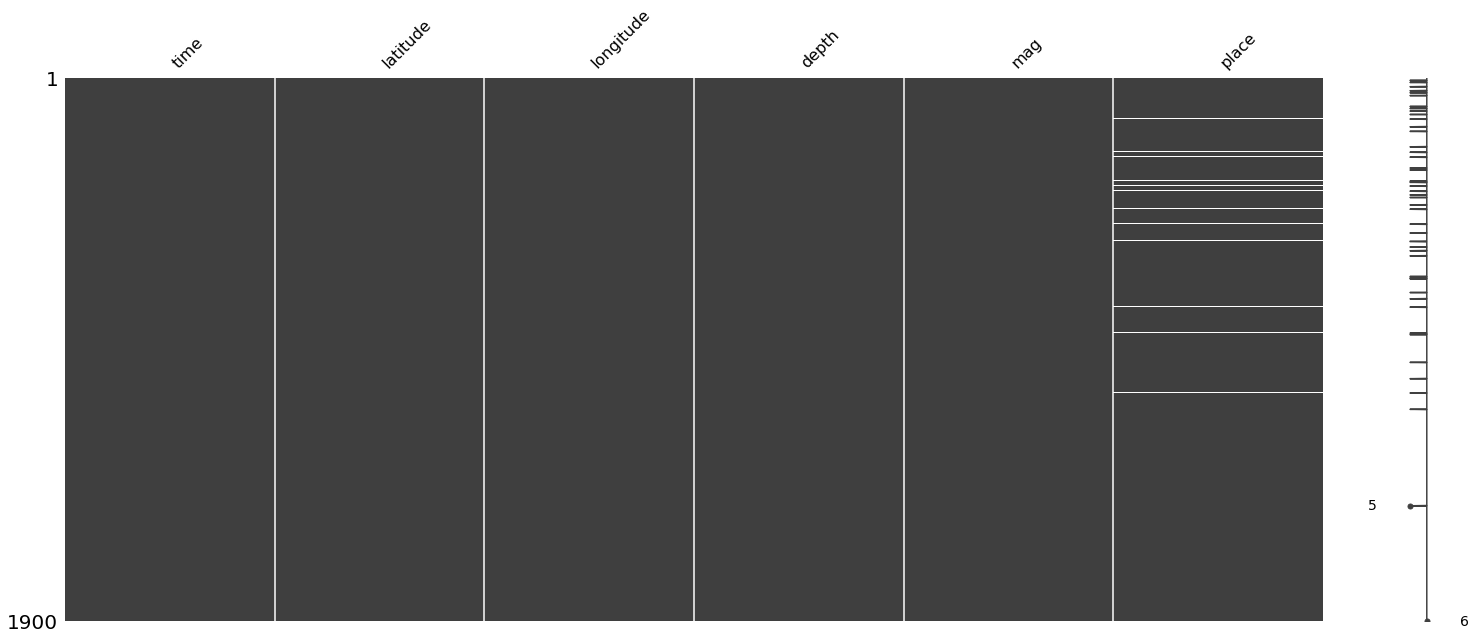

In [ ]:
#@title Cek data yang kosong dengan grafik.
msno.matrix(df_new)

Pada data ```place```, terdapat data kosong. Ini dikarenakan beberapa titik pusat gempa (*episentrum*) tidak memiliki nama yang tepat.

#Mendeskripsikan Data

In [ ]:
#@title Mendeskripsikan data dengan angka.
df_new.describe()

,latitude,longitude,depth,mag
count,1900.000000,1900.000000,1900.000000,1900.000000
mean,-2.986723,121.925273,90.184204,4.488895
std,4.646533,11.087120,109.487635,0.349132
min,-10.999000,95.024900,3.331000,3.900000
25%,-7.252250,118.614675,10.000000,4.300000
50%,-3.421800,126.294050,50.853000,4.400000
75%,1.389925,128.660800,128.770000,4.600000
max,5.997700,140.587100,608.287000,6.900000


In [ ]:
#@title Pendefinisian fungsi menampilkan histogram.
def tampilkanHist(data_only): # Fungsi yang digunakan untuk melihat ringkasan histogram

  ax = sns.distplot(data_only, hist=True, kde=True,
             bins=int(20), color = 'darkBlue')
  print(ax.lines)
  data_onlyX,data_onlyY = ax.lines[0].get_data()

  max_onlyX=max(data_onlyX)
  max_onlyY=max(data_onlyY)
  mean=sum(np.array(data_only))/(len(data_only)-1)
  q1=np.percentile(data_only,25)
  median=np.median(np.array(data_only))
  q3=np.percentile(data_only,75)
  mode=data_onlyX[np.where(data_onlyY == max_onlyY)][0]
  sd=np.std(data_only)

  print("Max X:", max_onlyX)
  print("Max Y:", max_onlyY)
  print("Mean:", mean)
  print("Q1:",q1)
  print("Median:", median)
  print("Q3:",q3)
  print("Mode:", mode)
  print("SD:", sd)
  print("IQR:",q3-q1)

  # Garis Mean
  plt.axvline(mean,color='r',linestyle='dashed')
  plt.text(mean*1.01, 0.1, 'Mean: {:.2f}'.format(mean), fontsize=20.0)

  # Garis Q1
  plt.axvline(q1,color='black',linestyle='dashed')
  plt.text(q1*1.01, (max_onlyY/2)*1.2, 'Q1: {:.2f}'.format(q1), fontsize=20.0)

  # Garis Median
  plt.axvline(median,color='g',linestyle='dashed')
  plt.text(median*1.01, max_onlyY/2, 'Median: {:.2f}'.format(median), fontsize=20.0)

  # Garis Q3
  plt.axvline(q3,color='black',linestyle='dashed')
  plt.text(q3*1.01, (max_onlyY/2)*0.8, 'Q3: {:.2f}'.format(q3), fontsize=20.0)

  # Garis Modus
  plt.axvline(mode,color='y',linestyle='dashed')
  plt.text(mode*1.01, max_onlyY-0.1, 'Mode: {:.2f}'.format(mode), fontsize=20.0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Max X: 7.131398604473827
Max Y: 1.565894989509604
Mean: 4.491258557135335
Q1: 4.3
Median: 4.4
Q3: 4.6
Mode: 4.382042026515388
SD: 0.34904054880363294
IQR: 0.2999999999999998


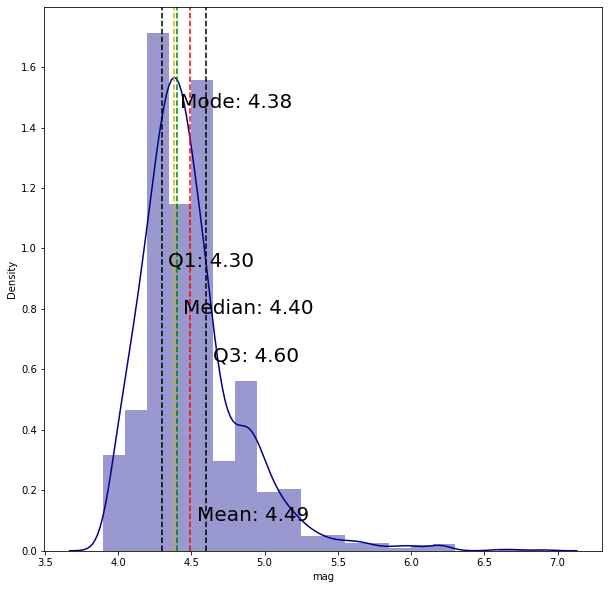

In [ ]:
#@title Mendeskripsikan magnitude gempa dengan grafik (histogram).
plt.figure(figsize=(10,10))
tampilkanHist(df_new["mag"])

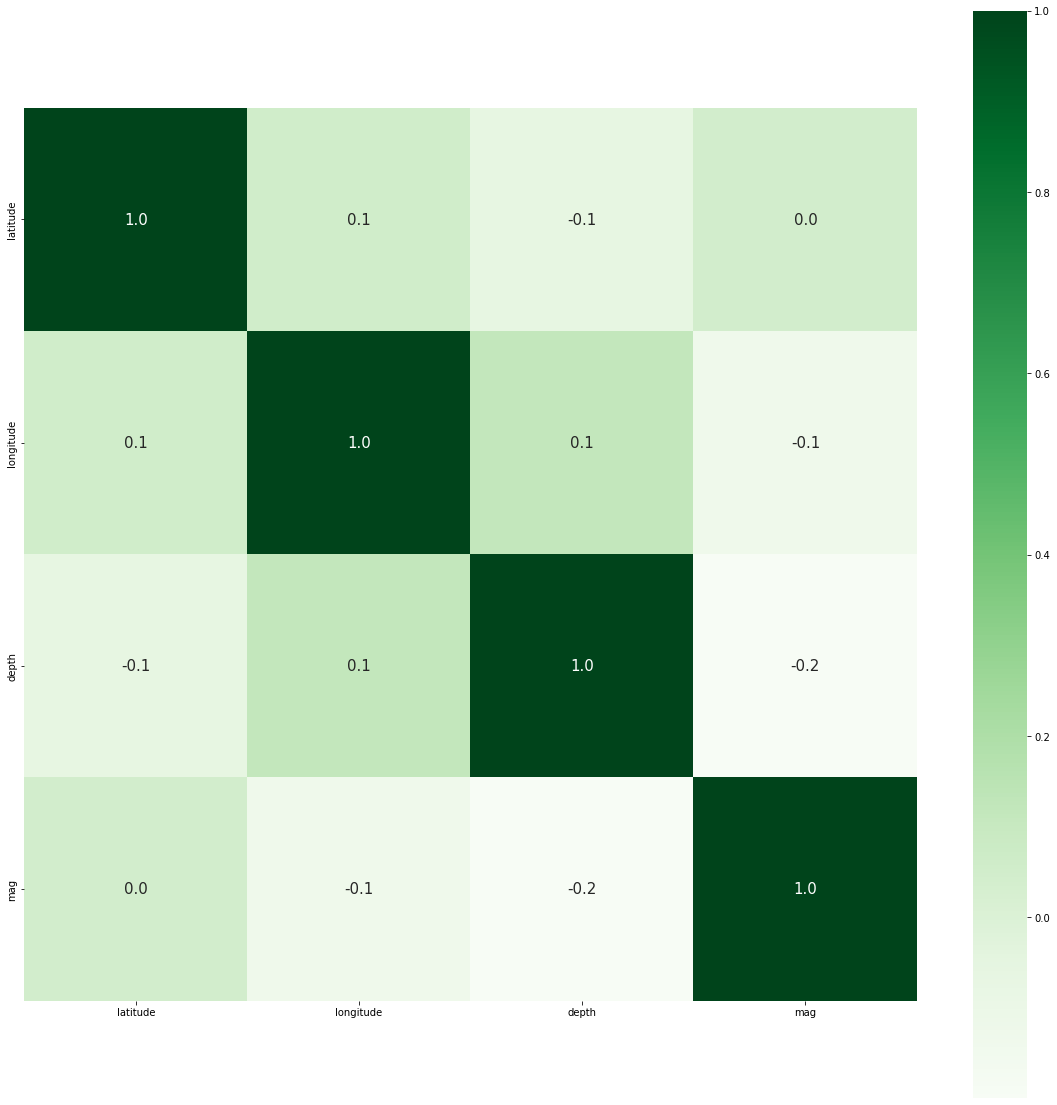

In [ ]:
#@title Mencari korelasi.
corr = df_new.corr()
corr.shape

# buat heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

Tidak ada korelasi.

[]

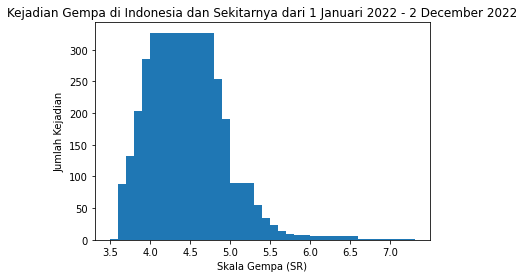

In [ ]:
#@title Kejadian Gempa di Indonesia dan Sekitarnya dari 1 Januari 2022 - 2 December 2022.
keyw = df_new['mag'].value_counts().keys()
countkeyw = df_new['mag'].value_counts()
plt.bar(keyw, countkeyw)
plt.title('Kejadian Gempa di Indonesia dan Sekitarnya dari 1 Januari 2022 - 2 December 2022')
plt.xlabel('Skala Gempa (SR)')
plt.ylabel('Jumlah Kejadian')
plt.plot()

<ipython-input-21-9d520d67afa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time'] = pd.to_datetime(df_new['time'])
<ipython-input-21-9d520d67afa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Month'] = df_new['time'].dt.month


[]

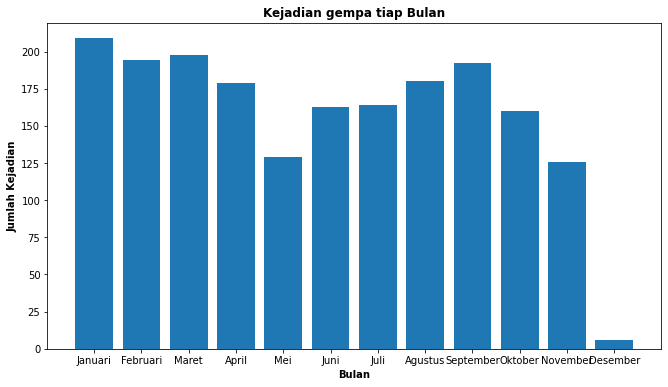

In [ ]:
#@title Banyaknya Kejadian Tiap Bulan
df_new['time'] = pd.to_datetime(df_new['time'])
df_new['Month'] = df_new['time'].dt.month
countw = df_new['Month'].value_counts()
keyw = df_new['Month'].value_counts().keys()
plt.figure(figsize=(11,6))
plt.xticks(ticks = range(1,13),labels = ['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'])
plt.bar(keyw, countw)
plt.title('Kejadian gempa tiap Bulan', fontweight='bold')
plt.xlabel('Bulan',fontweight='bold')
plt.ylabel('Jumlah Kejadian', fontweight='bold')
plt.plot()

In [ ]:
df_new[df_new['depth'] < 20]

,time,latitude,longitude,depth,mag,place,Month
3,2022-12-01 08:29:42.460000+00:00,-5.0816,100.7432,10.000,5.1,"220 km SW of Bengkulu, Indonesia",12
9,2022-11-29 06:51:53.844000+00:00,-2.9426,129.8216,10.000,4.3,NaN,11
11,2022-11-28 22:26:40.366000+00:00,-2.9334,129.7933,10.000,5.1,"Seram, Indonesia",11
18,2022-11-26 09:59:40.427000+00:00,-3.4243,130.8860,10.000,4.1,"218 km E of Amahai, Indonesia",11
26,2022-11-23 18:36:53.792000+00:00,2.2621,129.3882,9.771,4.3,"164 km ENE of Tobelo, Indonesia",11
...,...,...,...,...,...,...,...
1872,2022-01-06 20:05:36.567000+00:00,-8.4329,130.4031,10.000,4.3,"Pulau Pulau Tanimbar, Indonesia",1
1874,2022-01-06 14:30:46.328000+00:00,-7.2389,105.1142,10.000,4.5,"123 km SW of Labuan, Indonesia",1
1887,2022-01-03 19:50:14.251000+00:00,-8.4223,130.5502,10.000,4.3,"Pulau Pulau Tanimbar, Indonesia",1
1894,2022-01-02 13:00:11.320000+00:00,-7.5453,127.0567,10.000,4.4,"108 km N of Lospalos, Timor Leste",1


Dangkal     1048
Menengah     754
Dalam         98
Name: depthclass, dtype: int64


<ipython-input-23-a50874fd3d3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['depthclass'] = df_new['depth']
<ipython-input-23-a50874fd3d3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['depthclass']= df_new['depthclass'].astype('object')


Text(0.5, 1.0, 'Klasifikasi Gempa sesuai Kedalamannya')

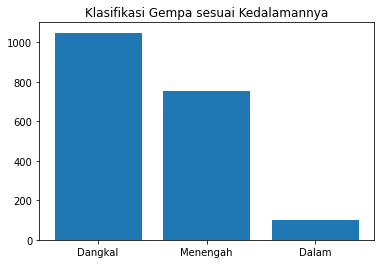

In [ ]:
#@title Kedalaman Gempa
df_new['depthclass'] = df_new['depth']
df_new['depthclass']= df_new['depthclass'].astype('object')
def conv(x):
  if x['depth'] <= 60:
    x['depthclass']  = 'Dangkal'
  elif x['depth'] > 60 and x['depth'] <=300:
    x['depthclass'] = 'Menengah'
  else :
    x['depthclass'] = 'Dalam'
  return x
df_new = df_new.apply(conv, axis = 1)

countw = df_new['depthclass'].value_counts()
keyw = df_new['depthclass'].value_counts().keys()
print(countw)
plt.bar(keyw,countw)
plt.title('Klasifikasi Gempa sesuai Kedalamannya')

In [ ]:
#@title Rata-rata magnitude gempa yang terjadi setiap bulan.
df_new['time'] = pd.to_datetime(df_new['time'])
df_new['Month'] = df_new['time'].dt.month
inimean = df_new.groupby(by='Month').mean()
inimean = inimean.reset_index()[['Month','mag']]
figmean = ex.line(inimean,x='Month',y='mag')
figmean.update_layout(
    title= 'Mean Earthquakes Magnitude setiap Bulan',
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0.0,
        dtick = 1
    )
)
figmean.show()

Dapat dilihat bahwa dalam 1 tahunnya, dari bulan oktober ke november kekuatan rata-rata gempa meningkat skala magnitude nya sampai mendekati rata-rata skala 4.65.

In [ ]:
#@title Boxplot
fig = px.box(df_new, y="mag")
fig.show()

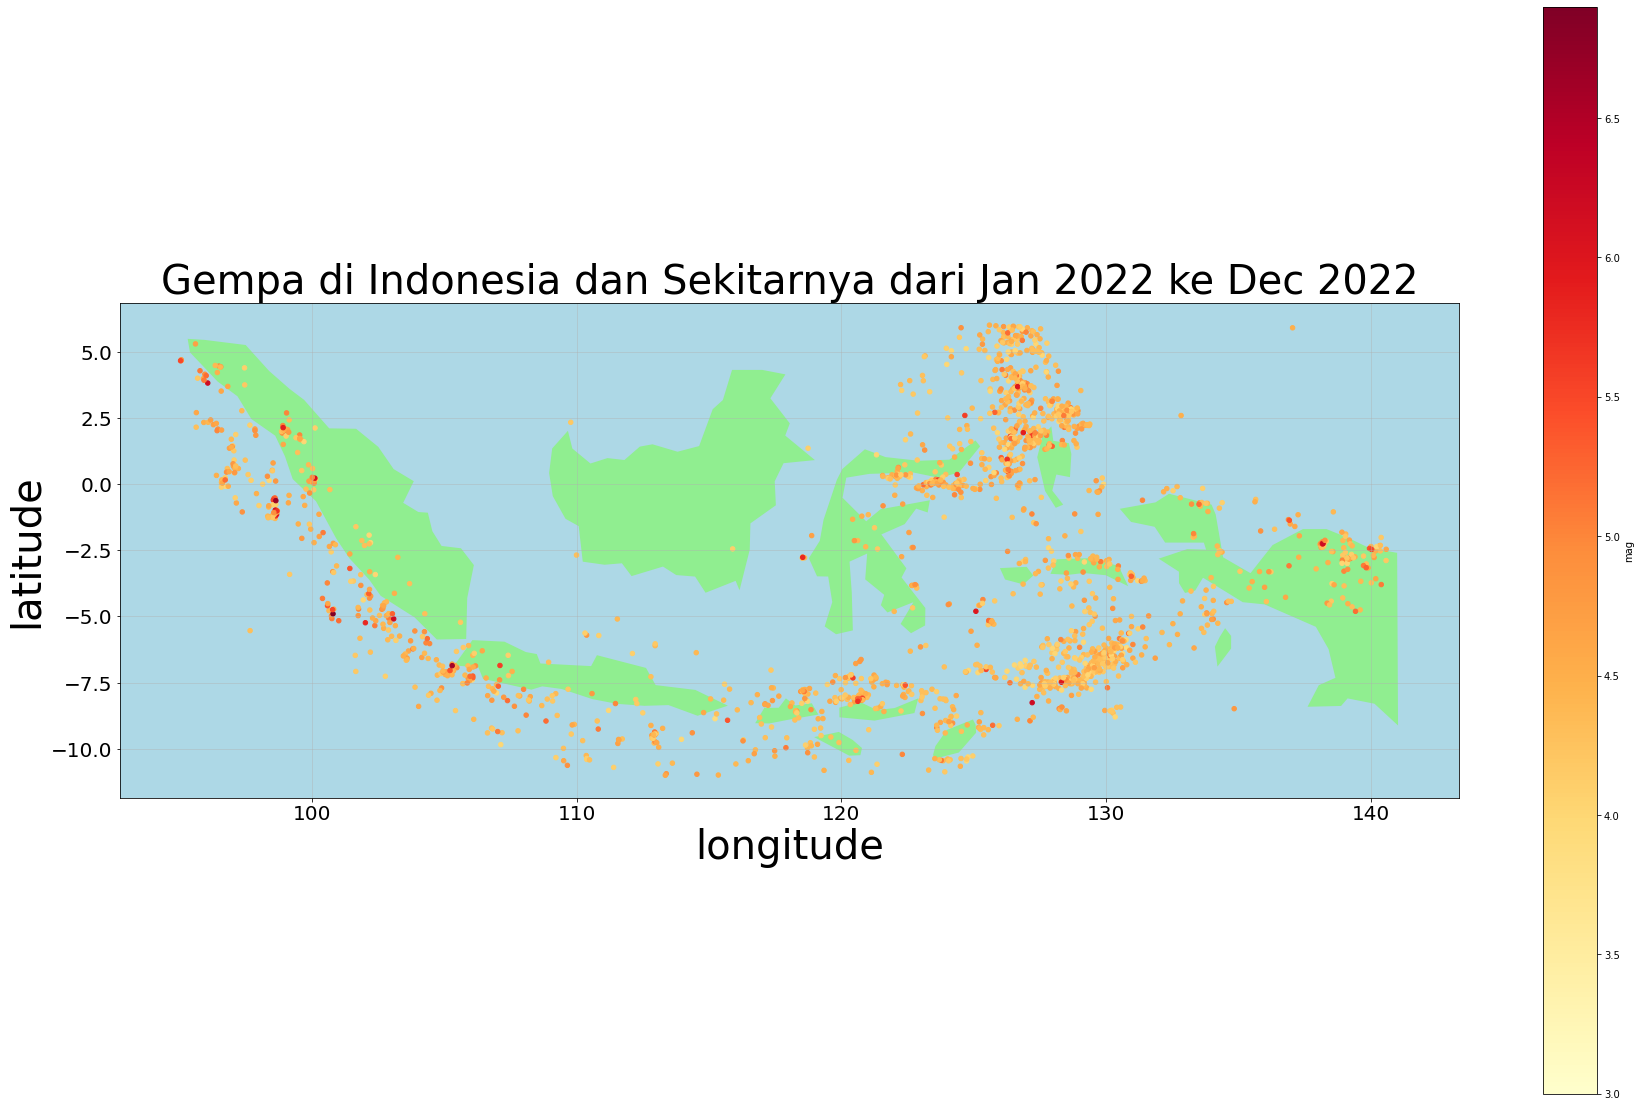

In [ ]:
#@title Peta persebaran gempa di Indonesia periode 1 January 2022 - 1 Januari 2022 - 2 December 2022

# initialize an axis
fig, ax = plt.subplots(figsize=(20,15))
# plot map on axis
countries = gpd.read_file(
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Indonesia"].plot(color="lightgreen",
                                                 ax=ax)
# parse dates for plot's title
first_month = df_new["time"].min().strftime("%b %Y")
last_month = df_new["time"].max().strftime("%b %Y")
# plot points
P = df_new.plot(x="longitude", y="latitude", kind="scatter",
        c="mag", colormap="YlOrRd",
        title=f"Gempa di Indonesia dan Sekitarnya dari {first_month} ke {last_month}",
        ax=ax, figsize = (30,20),vmin=3, fontsize=20)
P.set_facecolor('lightblue')
P.title.set_size(40)
plt.xlabel('longitude', fontsize=40)
plt.ylabel('latitude', fontsize=40)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()